# Segmenting and Clustering Neighborhoods in Toronto (Part III)



#### Begin by importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import urllib

#### Use the BeautifulSoup package for reading the wikipedia page containing Toronto postal codes

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_doc =  urllib.request.urlopen(url).read()
soup = BeautifulSoup(html_doc, 'html.parser')

#### Scrape the html document into a data frame

In [3]:
table = soup.body.table
headers = table.find_all('th')

headers_list = [h.text.rstrip('\n') for h in headers]

cur_row = []
rows = []

for row in table.select('tr')[1:]:
    for col in row.select('td'):
        cur_row.append(col.text.rstrip('\n'))
    rows.append(cur_row)
    cur_row = []
    
df = pd.DataFrame(data = rows, columns = headers_list)

#### Group neighbourhoods by postcode and format the table

In [4]:
df = df[df.Borough.str.lower() != 'not assigned']

df['Neighbourhood'] = df.apply(lambda row: row.Neighbourhood if row.Neighbourhood.lower() != 'not assigned' else row.Borough, axis=1 ) 

df  = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()

df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [6]:
df.shape

(103, 3)

#### Read the longitude and latitude information for each postcode from csv file and join with scraped table

In [304]:
df_latlng = pd.read_csv('Geospatial_Coordinates.csv')

df_latlng = df_latlng.rename(columns = {"Postal Code" : "Postcode"})

df_neigh_coord = df.join(df_latlng.set_index('Postcode'), on='Postcode', how = 'inner').reset_index()

df_neigh_coord

,index,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


#### Import and install required packages and libraries for displaying maps, plotting and handling json

In [6]:
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-2.2.2               |        py36_1001         494 KB  conda-forge
    ------------------------------------------------------------
                         

#### Filter out neighbourhoods that do not belong to Toronto

In [397]:
df_toronto = df_neigh_coord[df_neigh_coord["Borough"].str.contains("Toronto")]
#df_toronto = df_neigh_coord
df_toronto.shape

(38, 6)

#### Foursquare credentials

In [398]:
CLIENT_ID = '0U1ATCXN2KTQSF5EFJJ3PZES15NSTUTU0UFXUX420E3KYF02' # your Foursquare ID
CLIENT_SECRET = '5JZN0KLV3YFGME5V1OWMKUEULFS3RDGXMKCVIEDLTCBQQWDG' # your Foursquare Secret
VERSION = '20181111' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0U1ATCXN2KTQSF5EFJJ3PZES15NSTUTU0UFXUX420E3KYF02
CLIENT_SECRET:5JZN0KLV3YFGME5V1OWMKUEULFS3RDGXMKCVIEDLTCBQQWDG


In [400]:
def getNearbyVenues(postcodes, latitudes, longitudes, radius=500, LIMIT=100):
    venues_list=[]
    for postcode, lat, lng in zip(postcodes, latitudes, longitudes):
        print(postcode)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            postcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Get venues (max 100) within a 500 meter radius from each latitude, longitude location using Foursquare API

In [401]:
toronto_venues = getNearbyVenues(postcodes=df_toronto['Postcode'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )
toronto_venues.head()

M4E
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6G
M6H
M6J
M6K
M6P
M6R
M6S
M7Y


,Postcode,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,43.676357,-79.293031,Starbucks,43.678798,-79.298045,Coffee Shop
1,M4E,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,M4E,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
3,M4E,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,M4E,43.676357,-79.293031,Beaches Fitness,43.680319,-79.290991,Gym / Fitness Center


#### Use onehot encoding on venue categories

In [402]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add postcode column back to dataframe
toronto_onehot['Postcode'] = toronto_venues['Postcode'] 

# move postcode column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Postcode,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M4E,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
toronto_onehot.shape

(1704, 234)

#### Check number of venue categories for each postcode

In [422]:
toronto_venues.groupby('Postcode').count()["Venue Category"]

Postcode
M4E      5
M4K     42
M4L     20
M4M     40
M4N      4
M4P      7
M4R     21
M4S     36
M4T      4
M4V     14
M4W      4
M4X     49
M4Y     86
M5A     49
M5B    100
M5C    100
M5E     57
M5G     89
M5H    100
M5J    100
M5K    100
M5L    100
M5N      1
M5P      4
M5R     24
M5S     31
M5T    100
M5V     14
M5W     94
M5X    100
M6G     16
M6H     17
M6J     62
M6K     22
M6P     24
M6R     15
M6S     35
M7Y     18
Name: Venue Category, dtype: int64

#### Group by postcode and take the mean frequency of each venue category within each postcode

In [405]:
toronto_grouped = toronto_onehot.groupby('Postcode').mean().reset_index()
toronto_grouped

,Postcode,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,M4E,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.20000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,M4K,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.02381,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.023810
2,M4L,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,M4M,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.025000
4,M4N,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,M4P,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,M4R,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.047619
7,M4S,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.027778,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,M4T,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,M4V,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.071429,0.000000,0.00,0.000000


In [423]:
toronto_grouped.shape

(38, 234)

#### Create a table of the top 10 venue categories for each postcode

In [424]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [425]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postcode'] = toronto_grouped['Postcode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Gym / Fitness Center,Coffee Shop,Neighborhood,Trail,Pub,Yoga Studio,Doner Restaurant,Diner,Discount Store,Dog Run
1,M4K,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bubble Tea Shop,Indian Restaurant,Bakery,Spa,Bookstore,Brewery
2,M4L,Park,Sushi Restaurant,Ice Cream Shop,Brewery,Sandwich Place,Burger Joint,Burrito Place,Fast Food Restaurant,Fish & Chips Shop,Italian Restaurant
3,M4M,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Convenience Store,Breakfast Spot,Brewery
4,M4N,Dim Sum Restaurant,Bus Line,Park,Swim School,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
5,M4P,Park,Grocery Store,Breakfast Spot,Food & Drink Shop,Hotel,Burger Joint,Sandwich Place,Diner,Ethiopian Restaurant,Electronics Store
6,M4R,Sporting Goods Shop,Coffee Shop,Clothing Store,Yoga Studio,Gym / Fitness Center,Gift Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Miscellaneous Shop
7,M4S,Dessert Shop,Sandwich Place,Italian Restaurant,Café,Seafood Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Indoor Play Area
8,M4T,Gym,Playground,Trail,Tennis Court,Donut Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Eastern European Restaurant
9,M4V,Coffee Shop,Pub,Pizza Place,Bagel Shop,Sports Bar,Supermarket,Sushi Restaurant,Light Rail Station,American Restaurant,Fried Chicken Joint


#### Analyze the best cluster size for the k-means model

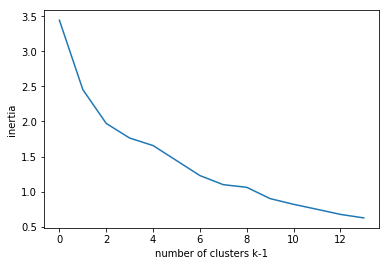

In [408]:
# find the best cluster size k
inertias = []
for k in range(1,15):
    toronto_grouped_clustering = toronto_grouped.drop('Postcode', 1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    
plt.plot(inertias)
plt.ylabel('inertia')
plt.xlabel('number of clusters k-1')
plt.show()

#### Based on the figure the kink occurs at k-1 = 2, so we should choose cluster size k = 3

In [426]:
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Postcode', 1)
   
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### Join cluster labels with venue and location data

In [410]:
toronto_merged = neighborhoods_venues_sorted

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df_toronto.set_index('Postcode'), on='Postcode')

toronto_merged.head() # check the last columns!

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,index,Borough,Neighbourhood,Latitude,Longitude
0,M4E,Gym / Fitness Center,Coffee Shop,Neighborhood,Trail,Pub,Yoga Studio,Doner Restaurant,Diner,Discount Store,Dog Run,1,37,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bubble Tea Shop,Indian Restaurant,Bakery,Spa,Bookstore,Brewery,1,41,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,Park,Sushi Restaurant,Ice Cream Shop,Brewery,Sandwich Place,Burger Joint,Burrito Place,Fast Food Restaurant,Fish & Chips Shop,Italian Restaurant,1,42,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Convenience Store,Breakfast Spot,Brewery,1,43,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Dim Sum Restaurant,Bus Line,Park,Swim School,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,1,44,Central Toronto,Lawrence Park,43.728020,-79.388790


In [22]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          82 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.17.0-py_0 conda-forge


geopy-1.17.0         | 49 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [24]:
address = 'Toronto, Ontario'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Toronto are 43.653963, -79.387207.


#### Visualize the clusters on Toronto map

In [411]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1 - Neighbourhoods near park, trail and playground areas

In [419]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[14,0] + list(range(1, toronto_merged.shape[1]))]]

,Neighbourhood,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,index,Borough,Neighbourhood,Latitude,Longitude
8,"Moore Park, Summerhill East",M4T,Gym,Playground,Trail,Tennis Court,Donut Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Eastern European Restaurant,0,48,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
10,Rosedale,M4W,Park,Playground,Trail,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,0,50,Downtown Toronto,Rosedale,43.679563,-79.377529
23,"Forest Hill North, Forest Hill West",M5P,Park,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,0,64,Central Toronto,"Forest Hill North, Forest Hill West",43.696948,-79.411307


#### Cluster 2 - Neighbourhoods near restaurants, cafés and shops (urban area)

In [420]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[14,0] + list(range(1, toronto_merged.shape[1]))]]

,Neighbourhood,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,index,Borough,Neighbourhood,Latitude,Longitude
0,The Beaches,M4E,Gym / Fitness Center,Coffee Shop,Neighborhood,Trail,Pub,Yoga Studio,Doner Restaurant,Diner,Discount Store,Dog Run,1,37,East Toronto,The Beaches,43.676357,-79.293031
1,"The Danforth West, Riverdale",M4K,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bubble Tea Shop,Indian Restaurant,Bakery,Spa,Bookstore,Brewery,1,41,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,"The Beaches West, India Bazaar",M4L,Park,Sushi Restaurant,Ice Cream Shop,Brewery,Sandwich Place,Burger Joint,Burrito Place,Fast Food Restaurant,Fish & Chips Shop,Italian Restaurant,1,42,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,Studio District,M4M,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Convenience Store,Breakfast Spot,Brewery,1,43,East Toronto,Studio District,43.659526,-79.340923
4,Lawrence Park,M4N,Dim Sum Restaurant,Bus Line,Park,Swim School,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,1,44,Central Toronto,Lawrence Park,43.728020,-79.388790
5,Davisville North,M4P,Park,Grocery Store,Breakfast Spot,Food & Drink Shop,Hotel,Burger Joint,Sandwich Place,Diner,Ethiopian Restaurant,Electronics Store,1,45,Central Toronto,Davisville North,43.712751,-79.390197
6,North Toronto West,M4R,Sporting Goods Shop,Coffee Shop,Clothing Store,Yoga Studio,Gym / Fitness Center,Gift Shop,Fast Food Restaurant,Diner,Mexican Restaurant,Miscellaneous Shop,1,46,Central Toronto,North Toronto West,43.715383,-79.405678
7,Davisville,M4S,Dessert Shop,Sandwich Place,Italian Restaurant,Café,Seafood Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Indoor Play Area,1,47,Central Toronto,Davisville,43.704324,-79.388790
9,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",M4V,Coffee Shop,Pub,Pizza Place,Bagel Shop,Sports Bar,Supermarket,Sushi Restaurant,Light Rail Station,American Restaurant,Fried Chicken Joint,1,49,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049
11,"Cabbagetown, St. James Town",M4X,Coffee Shop,Restaurant,Italian Restaurant,Pub,Café,Indian Restaurant,Pizza Place,Bakery,Beer Store,Bar,1,51,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675


#### Cluster 3 - Garden area

In [427]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[14,0] + list(range(1, toronto_merged.shape[1]))]]

,Neighbourhood,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,index,Borough,Neighbourhood,Latitude,Longitude
22,Roselawn,M5N,Garden,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,2,63,Central Toronto,Roselawn,43.711695,-79.416936


#### As expected most locations are in the Toronto inner city are similar since they are dominated by shops, cafés and restaurants.